<a href="https://colab.research.google.com/github/enzodpaiva/recuperacao-img-histograma/blob/main/histogram-img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Enzo Paiva
RGA: 2020.1907.066-6

# import lib

In [ ]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
drive.mount('/content/drive/')
from skimage import io
from skimage.metrics import structural_similarity as ssim
from skimage.color import rgb2hsv

Mounted at /content/drive/


# diretorio de imagens

In [ ]:
path = '/content/drive/MyDrive/semestre8/tpi/databaseImagesTrab1'

# processa imagens

## process gray

In [ ]:
def calcGrayPdf(image):
  hist, bins = np.histogram(image, bins=256, range=[0, 256])
  pdf = hist / np.sum(hist)

  return pdf

In [ ]:
  #distances = [np.linalg.norm(input_pdf - pdf) for pdf in pdfs_list]
  def calcDistancePdfGray(pdfs_list, pdf_uploaded):
    distances = []
    for pdf in pdfs_list:
      #Calcula a distância euclidiana entre as PDFs
      distance = np.linalg.norm(pdf_uploaded - pdf)
      distances.append(distance)

    return distances

In [ ]:
def returnNumImagesSimilarGray(pdfs_list, pdf_uploaded, num):
  distances = calcDistancePdfGray(pdfs_list, pdf_uploaded)
  most_similar = np.argsort(distances)[:num]
  return most_similar

In [ ]:
def isImageMatchGray(image1, image2, threshold=0.8):
  # Calcule a PDF em RGB para ambas as imagens
  pdf1 = calcGrayPdf(image1)
  pdf2 = calcGrayPdf(image2)

  # Calcule a distância entre as PDFs
  #distance = calcDistancePdfGray(pdf1, pdf2)
  distance = np.linalg.norm(pdf1 - pdf2)

  # Você pode ajustar o limiar de distância conforme necessário
  return distance < threshold

In [ ]:
def processGray(image, numImageUserWant):
  pdf_uploaded = calcGrayPdf(image)
  pdfs_list = []
  image_names = []

  for filename in os.listdir(path):
    image_path = os.path.join(path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    pdf = calcGrayPdf(image)
    pdfs_list.append(pdf)
    image_names.append(filename)

  correct_images = []
  # Mostra as imagens mais parecidas
  plt.figure(figsize=(15, 5))
  most_similar = returnNumImagesSimilarGray(pdfs_list, pdf_uploaded, numImageUserWant)
  for i, idx in enumerate(most_similar):
    image_path = os.path.join(path, image_names[idx])
    similar_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, numImageUserWant, i + 1)
    plt.imshow(similar_image, cmap='gray')
    plt.title(f"Imagem {i+1} - {image_names[idx]}")

    if isImageMatchGray(image, similar_image):
      correct_images.append(similar_image)

  plt.tight_layout()
  plt.show()
  percentage_correct_gray = (len(correct_images) / numImageUserWant) * 100
  print(f"Porcentagem de Classificação Correta em Tons de Cinza: {percentage_correct_gray:.2f}%")

## process RGB

In [ ]:
def calcDistancePdfRgb(pdf1, pdf2):
  distance_r = np.linalg.norm(pdf1[0] - pdf2[0])
  distance_g = np.linalg.norm(pdf1[1] - pdf2[1])
  distance_b = np.linalg.norm(pdf1[2] - pdf2[2])
  return distance_r + distance_g + distance_b

In [ ]:
def returnNumImagesSimilarRgb(pdfs_list, input_pdf, num):
    distances = [calcDistancePdfRgb(input_pdf, pdf) for pdf in pdfs_list]
    most_similar = np.argsort(distances)[:num]
    return most_similar

In [ ]:
def calcRGBPdf(image):
  # Separa os canais de cores (R, G, B)
  r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

  # Calcula os histogramas para cada canal
  hist_r, bins_r = np.histogram(r, bins=256, range=[0, 256])
  hist_g, bins_g = np.histogram(g, bins=256, range=[0, 256])
  hist_b, bins_b = np.histogram(b, bins=256, range=[0, 256])

  # Calcula as PDFs para cada canal
  pdf_r = hist_r / np.sum(hist_r)
  pdf_g = hist_g / np.sum(hist_g)
  pdf_b = hist_b / np.sum(hist_b)

  return pdf_r, pdf_g, pdf_b

In [ ]:
def isImageMatchRgb(image1, image2, threshold=0.9):
  # Calcule a PDF em RGB para ambas as imagens
  pdf_r1, pdf_g1, pdf_b1 = calcRGBPdf(image1)
  pdf_r2, pdf_g2, pdf_b2 = calcRGBPdf(image2)

  # Calcule a distância entre as PDFs
  distance_r = calcDistancePdfRgb(pdf_r1, pdf_r2)
  distance_g = calcDistancePdfRgb(pdf_g1, pdf_g2)
  distance_b = calcDistancePdfRgb(pdf_b1, pdf_b2)

  # Você pode ajustar o limiar de distância conforme necessário
  return distance_r < threshold and distance_g < threshold and distance_b < threshold

In [ ]:
def processRgb(image, numImageUserWant):
  # Calcula a PDF em RGB para a imagem de entrada
  pdf_r, pdf_g, pdf_b = calcRGBPdf(image)

  # Lista para armazenar as PDFs das imagens da pasta
  pdfs_list = []
  image_names = []

  # Loop através de cada arquivo de imagem na pasta
  for filename in os.listdir(path):
    # Carrega a imagem usando OpenCV
    image_path = os.path.join(path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Carrega a imagem em formato RGB

    # Calcula a PDF em RGB
    pdf_r_i, pdf_g_i, pdf_b_i = calcRGBPdf(image)

        # Armazena as PDFs em uma lista
    pdfs_list.append((pdf_r_i, pdf_g_i, pdf_b_i))
    image_names.append(filename)

  most_similar = returnNumImagesSimilarRgb(pdfs_list, (pdf_r, pdf_g, pdf_b), numImageUserWant)

  correct_images = []

  plt.figure(figsize=(15, 5))
  for i, idx in enumerate(most_similar):
    image_path = os.path.join(path, image_names[idx])
    similar_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    plt.subplot(1, numImageUserWant, i + 1)
    plt.imshow(cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB))  # Converte de BGR para RGB
    plt.title(f"Imagem {i+1} ({image_names[idx]})")

    if isImageMatchRgb(image, similar_image):
      correct_images.append(similar_image)

  plt.tight_layout()
  plt.show()
  percentage_correct_rgb = (len(correct_images) / numImageUserWant) * 100
  print(f"Porcentagem de Classificação Correta em RGB: {percentage_correct_rgb:.2f}%")

## process HSV

In [ ]:
def calcHSVPdf(image):
  hsv_image = rgb2hsv(image)  # Converte a imagem de RGB para HSV
  h, s, v = hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]

  hist_h = np.histogram(h, bins=256, range=[0, 1])[0]
  hist_s = np.histogram(s, bins=256, range=[0, 1])[0]
  hist_v = np.histogram(v, bins=256, range=[0, 1])[0]

  pdf_h = hist_h / np.sum(hist_h)
  pdf_s = hist_s / np.sum(hist_s)
  pdf_v = hist_v / np.sum(hist_v)

  return pdf_h, pdf_s, pdf_v

In [ ]:
def calcDistancePdfHSV(pdf1, pdf2):
  distance_h = np.linalg.norm(pdf1[0] - pdf2[0])
  distance_s = np.linalg.norm(pdf1[1] - pdf2[1])
  distance_v = np.linalg.norm(pdf1[2] - pdf2[2])
  return (distance_h + distance_s + distance_v) / 3.0

In [ ]:
def returnNumImagesSimilarHSV(pdfs_list, input_pdf, num):
  distances = [calcDistancePdfHSV(input_pdf, pdf) for pdf in pdfs_list]
  most_similar = np.argsort(distances)[:num]
  return most_similar

In [ ]:
def isImageMatchHSV(image1, image2, threshold=0.95):
  # Calcule as PDFs HSV para ambas as imagens
  pdf_h1, pdf_s1, pdf_v1 = calcHSVPdf(image1)
  pdf_h2, pdf_s2, pdf_v2 = calcHSVPdf(image2)

  # Calcule a distância entre as PDFs
  distance_h = calcDistancePdfHSV(pdf_h1, pdf_h2)
  distance_s = calcDistancePdfHSV(pdf_s1, pdf_s2)
  distance_v = calcDistancePdfHSV(pdf_v1, pdf_v2)

  # Você pode ajustar o limiar de distância conforme necessário
  return distance_h < threshold and distance_s < threshold and distance_v < threshold

In [ ]:
def processHsv(image, numImageUserWant):
  pdf_h, pdf_s, pdf_v = calcHSVPdf(image)

  pdfs_list = []
  image_names = []

  # Loop através de cada arquivo de imagem na pasta
  for filename in os.listdir(path):
    # Carrega a imagem usando OpenCV
    image_path = os.path.join(path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Carrega a imagem em formato RGB

    # Calcula a PDF em HSV
    pdf_h_i, pdf_s_i, pdf_v_i = calcHSVPdf(image)

    # Armazena as PDFs em uma lista
    pdfs_list.append((pdf_h_i, pdf_s_i, pdf_v_i))
    image_names.append(filename)

  most_similar = returnNumImagesSimilarHSV(pdfs_list, (pdf_h, pdf_s, pdf_v), numImageUserWant)

  correct_images = []
  plt.figure(figsize=(15, 5))
  for i, idx in enumerate(most_similar):
    image_path = os.path.join(path, image_names[idx])
    similar_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    plt.subplot(1, numImageUserWant, i + 1)
    plt.imshow(cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB))  # Converte de BGR para RGB
    plt.title(f"Imagem {i+1} ({image_names[idx]})")

    # Verifique se a imagem retornada é uma correspondência correta e adicione à lista
    if isImageMatchHSV(image, similar_image):
      correct_images.append(similar_image)

  plt.tight_layout()
  plt.show()

  # Calcule a porcentagem de classificação correta em HSV
  percentage_correct_hsv = (len(correct_images) / numImageUserWant) * 100
  print(f"Porcentagem de Classificação Correta em HSV: {percentage_correct_hsv:.2f}%")

# Main

In [ ]:
def process_image(escolha, image, numImgsReturn):
    switch = {
        1: lambda: processGray(image, numImgsReturn),
        2: lambda: processRgb(image, numImgsReturn),
        3: lambda: processHsv(image, numImgsReturn)
    }
    return switch.get(escolha, lambda: "Escolha inválida")()

Saving c002_004.png to c002_004 (44).png
escolha como quer o processamento da imagem sendo: 1 - niveis de cinza / 2 - RGB / 3 - HSV / 4 - Sair
1
escolha quantas imagens quer retornar
4


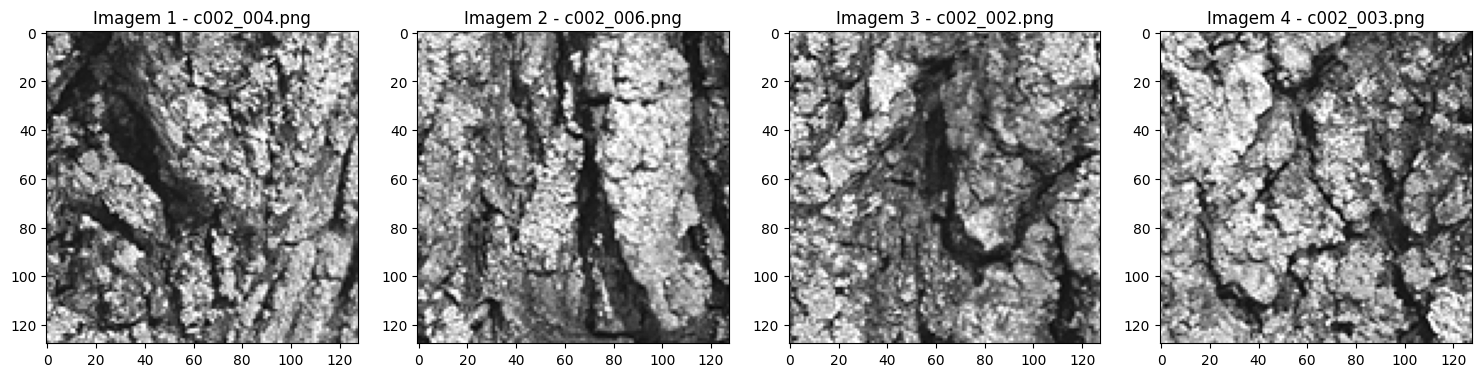

Porcentagem de Classificação Correta em Tons de Cinza: 100.00%
None
Saving c002_004.png to c002_004 (45).png
escolha como quer o processamento da imagem sendo: 1 - niveis de cinza / 2 - RGB / 3 - HSV / 4 - Sair
2
escolha quantas imagens quer retornar
4


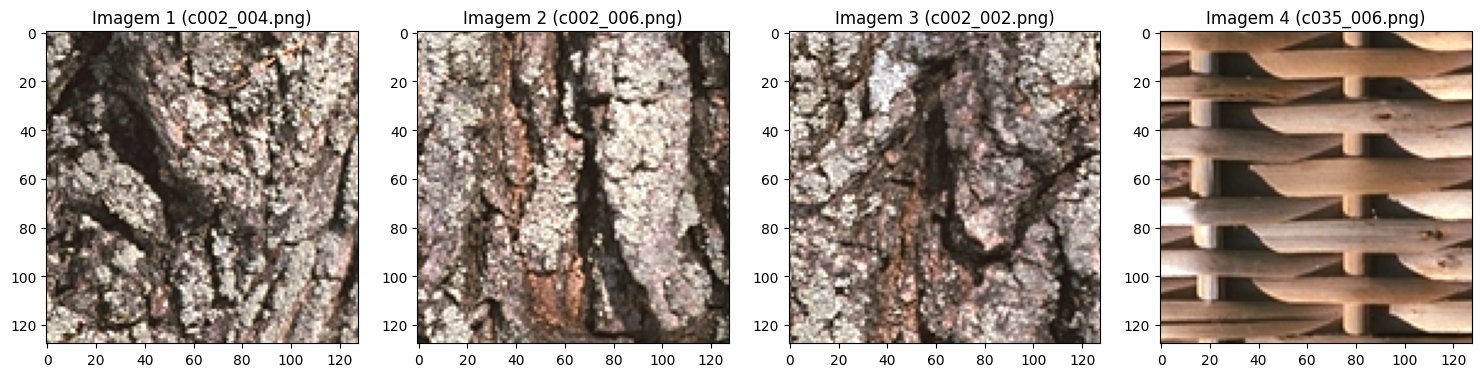

Porcentagem de Classificação Correta em RGB: 100.00%
None


Saving c002_004.png to c002_004 (46).png
escolha como quer o processamento da imagem sendo: 1 - niveis de cinza / 2 - RGB / 3 - HSV / 4 - Sair
3
escolha quantas imagens quer retornar
4


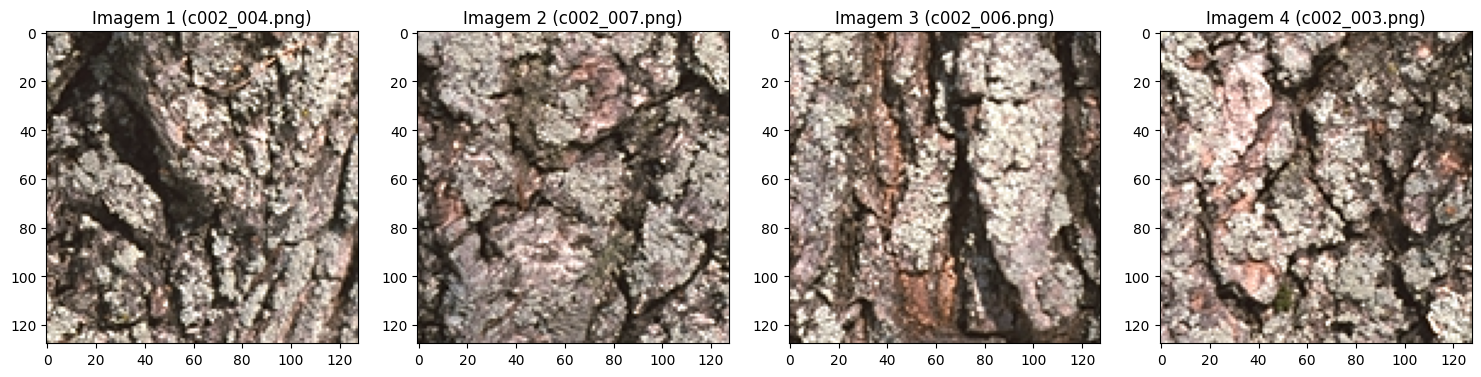

Porcentagem de Classificação Correta em HSV: 100.00%
None


Algo inesperado aconteceu ou a imagem não pode ser processada list index out of range. Até logo!


In [ ]:
while True:
  try:
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    print("escolha como quer o processamento da imagem sendo: 1 - niveis de cinza / 2 - RGB / 3 - HSV / 4 - Sair")
    escolha = int(input())

    if escolha == 4:
      print("Opcao de saida escolhida. Até logo!")
      break  # Sai do loop se o usuário escolher parar

    print("escolha quantas imagens quer retornar")
    numImgsReturn = int(input())

    if escolha == 1:
      image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    else:
      image = cv2.imread(file_name, cv2.IMREAD_COLOR)

    result = process_image(escolha, image, numImgsReturn)
    print(result)
  except Exception as e:
    print(f"Algo inesperado aconteceu ou a imagem não pode ser processada {e}. Até logo!")
    break

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving foto-com-doc.jpeg to foto-com-doc.jpeg


In [ ]:
print("PDF da imagem:", pdf_uploaded)
print("Tipo de dado da PDF:", pdf_uploaded.dtype)

NameError: ignored